# Processamento de Sinal <small>       <br>Fundamentos de Ciência e Engenharia de Dados               <br>  Mestrado em Engenharia e Ciência de Dados <br> Faculdade de Engenharia da Universidade do Porto <br>Dezembro 2020 </small>

# <u>Cotações Psi-20 </u> # 

## Tabela de conteúdos:
* [Introdução](#chapter1)
* [Importação dos dados e obtenção dos sinais](#chapter2)
* [Pré-processamento](#chapter3)
* [Análise dos sinais e extração de features](#chapter4)
* [Clusterização](#chapter5)  

* [Constituição do grupo](#chapter6)

# Introdução<a class="anchor" id="chapter1"></a>


<div style="text-align: justify"> Neste projeto, iremos analisar sinais referentes ao valor de ações de 10 empresas cotadas no PSI-20 (<i> Portuguese Stock Index</i>), durante 5 anos (2015 a 2019). As empresas consideradas foram: ALTRI SGPS, BCP, Corticeira Amorim, CTT, EDP Renováveis, Galp, Jerónimo Martins, Nova Base, REN e Semapa. O objetivo é conseguir extrair 5 <i> features</i> relevantes destes sinais e, seguidamente, utilizar o algoritmo K-means para formar <i> clusters</i>.
   <br> Os dados utilizados foram retirados de <a href="https://finance.yahoo.com/quote/PSI20.LS/components?p=PSI20.LS">https://finance.yahoo.com/quote/PSI20.LS/components?p=PSI20.LS</a> .
  <br> <br> Inicialmente, pensamos em elaborar este trabalho com os dados referentes aos 11 meses de 2020 já decorridos mas, a fim de tentar encontar alguma periodicidade nos sinais, alteramos os objetos de análise para o período anteriormente indicado.  

# Importação dos dados e obtenção dos sinais <a class="anchor" id="chapter2"></a>

Começamos por importar os dados e obter uma primeira visualização de cada sinal para perceber o pré-processamento que possa requerer.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy as sp
from datetime import datetime
import scipy.fftpack
import scipy.signal as sg
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.signal import butter, lfilter
from scipy.signal import freqz
from numpy.random import randn
import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go
from IPython.display import HTML, display
import tabulate
import import_ipynb
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
#importar notebook de cada cotação
from ALTR import ALTR
from BCP import BCP
from COR import COR
from CTT import CTT
from EDP import EDP
from GALP import GALP
from JMT import JMT
from NBA import NBA
from RENE import RENE
from SEM import SEM

importing Jupyter notebook from ALTR.ipynb
importing Jupyter notebook from BCP.ipynb
importing Jupyter notebook from COR.ipynb
importing Jupyter notebook from CTT.ipynb
importing Jupyter notebook from EDP.ipynb
importing Jupyter notebook from GALP.ipynb
importing Jupyter notebook from JMT.ipynb
importing Jupyter notebook from NBA.ipynb
importing Jupyter notebook from RENE.ipynb
importing Jupyter notebook from SEM.ipynb


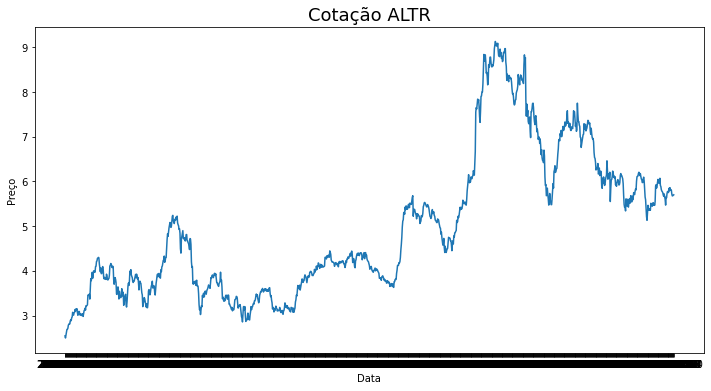

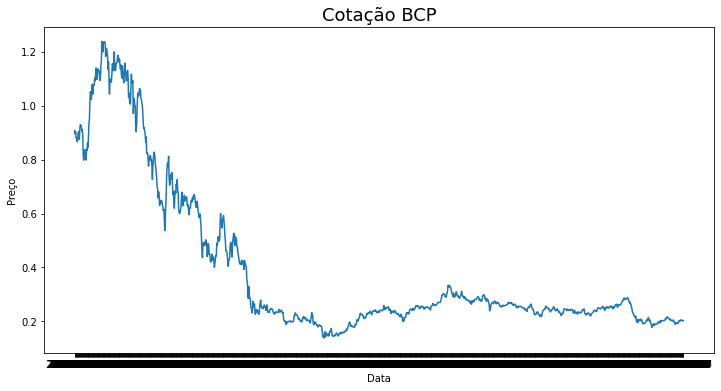

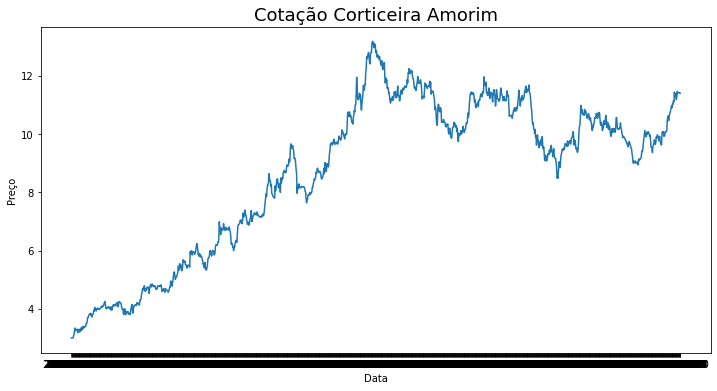

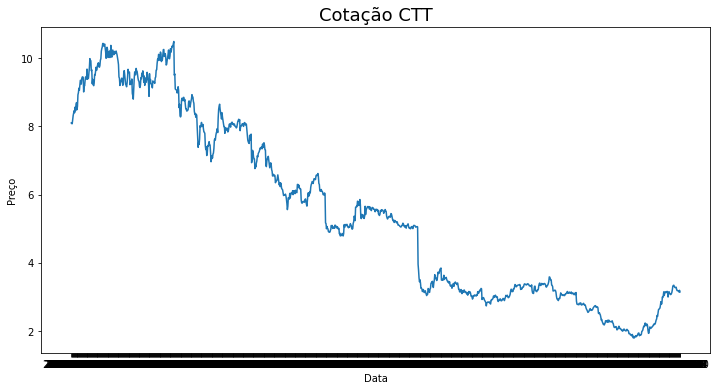

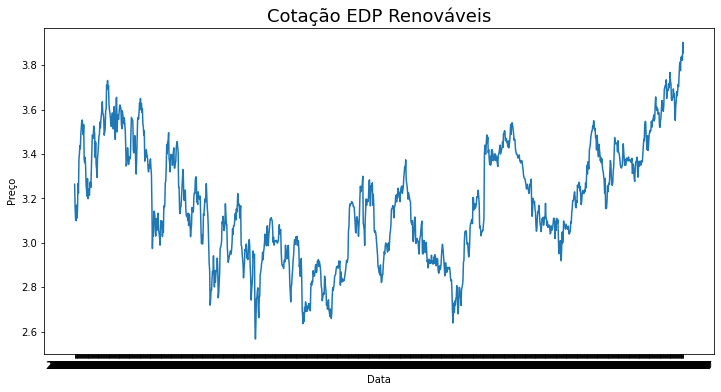

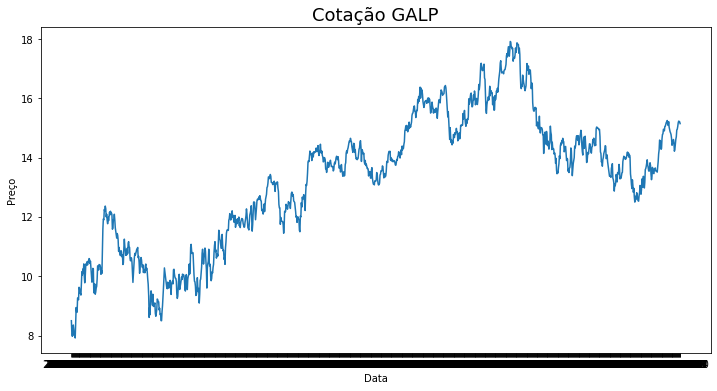

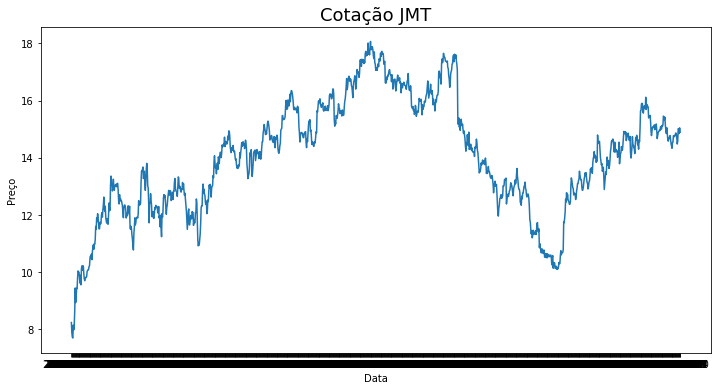

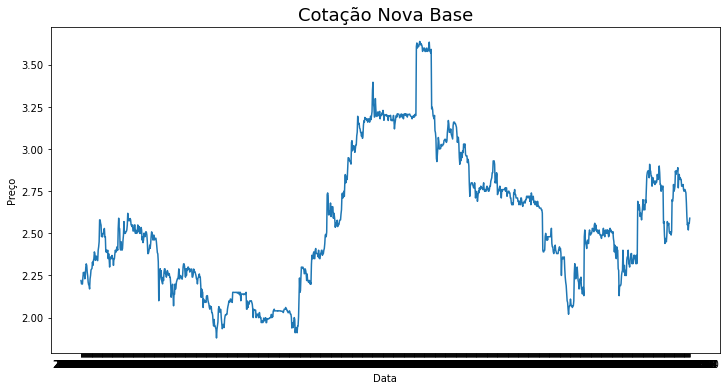

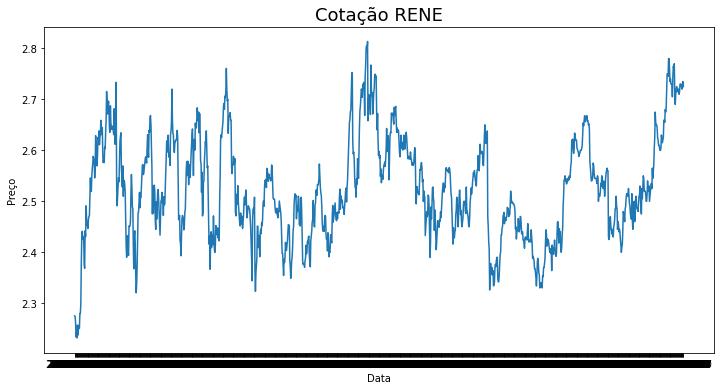

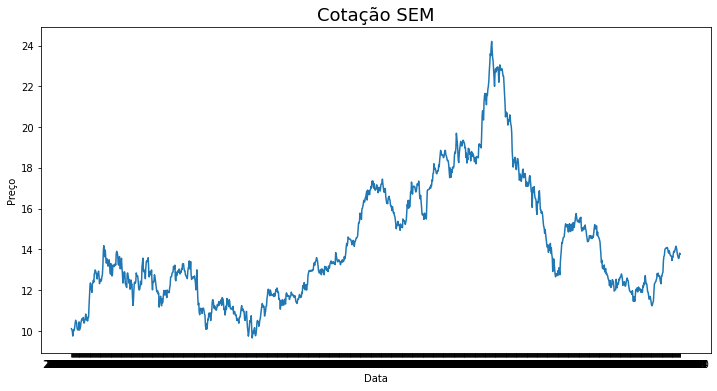

In [3]:
altr = ALTR()
data_altr = altr.get_data()
bcp = BCP()
data_bcp = bcp.get_data()
cor = COR()
data_cor = cor.get_data()
ctt = CTT()
data_ctt = ctt.get_data()
edp = EDP()
data_edp = edp.get_data()
galp = GALP()
data_galp = galp.get_data()
jmt = JMT()
data_jmt = jmt.get_data()
nba = NBA()
data_nba = nba.get_data()
rene = RENE()
data_rene = rene.get_data()
sem = SEM()
data_sem = sem.get_data()

altr.plot(data_altr)
bcp.plot(data_bcp)
cor.plot(data_cor)
ctt.plot(data_ctt)
edp.plot(data_edp)
galp.plot(data_galp)
jmt.plot(data_jmt)
nba.plot(data_nba)
rene.plot(data_rene)
sem.plot(data_sem)


# Pré-processamento <a class="anchor" id="chapter3"></a>

<div style="text-align: justify"> Após verificarmos se os sinais tinham valores em falta, como estes têm bastante ruído, utilizamos um filtro <i> passa-baixo</i> para obter, em cada caso, um novo sinal filtrado. O nível de ajustamento do sinal filtrado ao sinal inicial varia de acordo com o valor definido para a variável <i>cutoff</i>. Isto pode resultar num sinal mais ou menos aproximado do real dependendo do objetivo do estudo. Nos gráficos abaixo vemos os sinais originais a azul e os sinais já filtrados a vermelho. Conseguimos perceber que os sinais filtrados são uma boa aproximação dos sinais originais mas sem ruído.

In [6]:
y_altr, datav_altr = altr.filter(data_altr)
y_bcp, datav_bcp = bcp.filter(data_bcp)
y_cor, datav_cor = cor.filter(data_cor)
y_ctt, datav_ctt = ctt.filter(data_ctt)
y_edp, datav_edp = edp.filter(data_edp)
y_galp, datav_galp = galp.filter(data_galp)
y_jmt, datav_jmt = jmt.filter(data_jmt)
y_nba, datav_nba = nba.filter(data_nba)
y_rene, datav_rene = rene.filter(data_rene)
y_sem, datav_sem = sem.filter(data_sem)

altr.plot_filter(y_altr, datav_altr)
bcp.plot_filter(y_bcp, datav_bcp)
cor.plot_filter(y_cor, datav_cor)
ctt.plot_filter(y_ctt, datav_ctt)
edp.plot_filter(y_edp, datav_edp)
galp.plot_filter(y_galp, datav_galp)
jmt.plot_filter(y_jmt, datav_jmt)
nba.plot_filter(y_nba, datav_nba)
rene.plot_filter(y_rene, datav_rene)
sem.plot_filter(y_sem, datav_sem)


# Análise dos sinais e extração de features <a class="anchor" id="chapter4"></a>

Com os sinais filtrados, e ainda no domínio do tempo, foram retiradas 4 <i>features</i> de cada sinal: valor mínimo, valor máximo, valor médio e número de picos atingidos. As 3 primeiras <i>features</i> permitir-nos-ão localizar cada empresa quanto às suas cotações.
A última <i>feature</i> ajudará a perceber que ações são mais estáveis ou mais oscilatórias.

In [7]:
peaks_altr, min_altr, max_altr, mean_altr = altr.statistics(y_altr)
peaks_bcp, min_bcp, max_bcp, mean_bcp = bcp.statistics(y_bcp)
peaks_cor, min_cor, max_cor, mean_cor = cor.statistics(y_cor)
peaks_ctt, min_ctt, max_ctt, mean_ctt = ctt.statistics(y_ctt)
peaks_edp, min_edp, max_edp, mean_edp = edp.statistics(y_edp)
peaks_galp, min_galp, max_galp, mean_galp = galp.statistics(y_galp)
peaks_jmt, min_jmt, max_jmt, mean_jmt = jmt.statistics(y_jmt)
peaks_nba, min_nba, max_nba, mean_nba = nba.statistics(y_nba)
peaks_rene, min_rene, max_rene, mean_rene = rene.statistics(y_rene)
peaks_sem, min_sem, max_sem, mean_sem = sem.statistics(y_sem)

<div style="text-align: justify"> Posteriormente, foi aplicada a Transformada Rápida de Fourier (FFT) a cada sinal para converter estes sinais do domínio do tempo para o domínio da frequência. A componente contínua do sinal foi também removida para se conseguir visualizar as diferentes variações na frequência (uma vez que a maior concentração estava em 0 dado que os sinais não são periódicos). 
    <br> Seguidamente, são apresentados os gráficos da FFT de cada sinal com a potência em escala logarítmica para facilitar a percepção das variações de frequências encontradas.

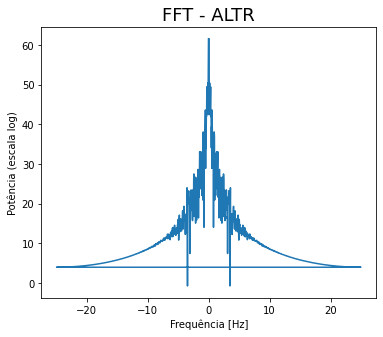

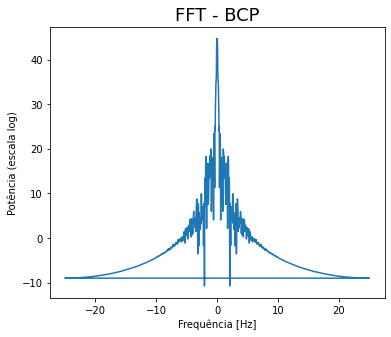

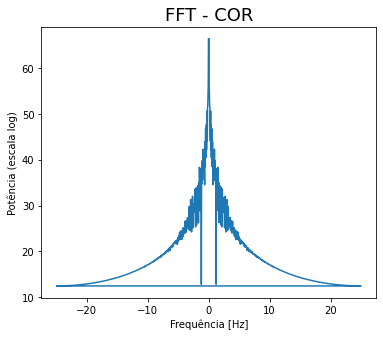

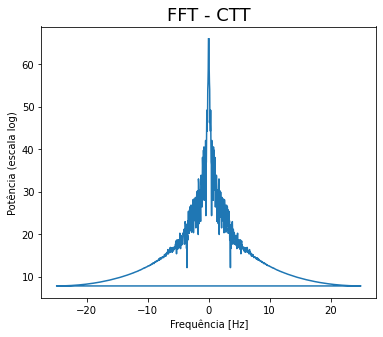

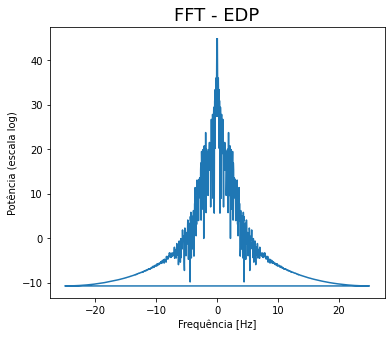

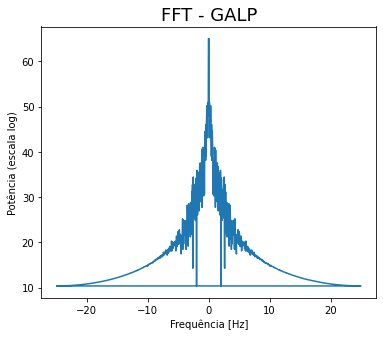

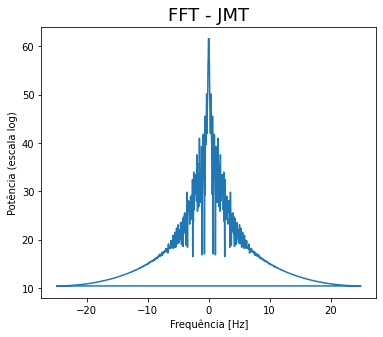

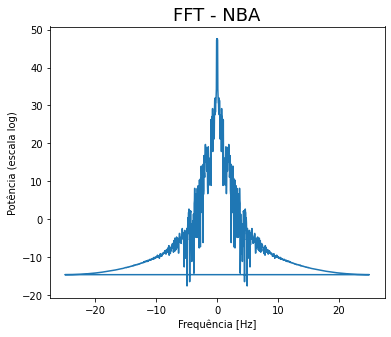

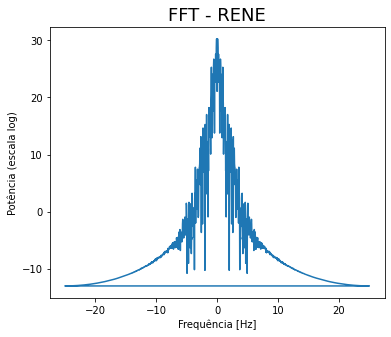

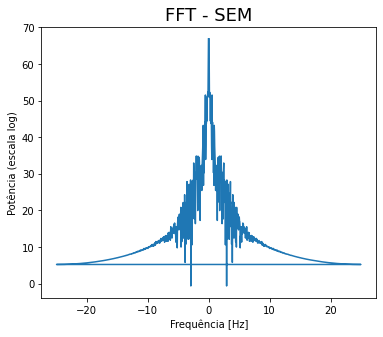

In [8]:
#FFT para os 10 sinais filtrados
sample_freq_altr, power_altr, freq_altr, pw_altr = altr.fft(y_altr)
sample_freq_bcp, power_bcp, freq_bcp, pw_bcp = bcp.fft(y_bcp)
sample_freq_cor, power_cor, freq_cor, pw_cor = cor.fft(y_cor)
sample_freq_ctt, power_ctt, freq_ctt, pw_ctt = ctt.fft(y_ctt)
sample_freq_edp, power_edp, freq_edp, pw_edp = edp.fft(y_edp)
sample_freq_galp, power_galp, freq_galp, pw_galp = galp.fft(y_galp)
sample_freq_jmt, power_jmt, freq_jmt, pw_jmt = jmt.fft(y_jmt)
sample_freq_nba, power_nba, freq_nba, pw_nba = nba.fft(y_nba)
sample_freq_rene, power_rene, freq_rene, pw_rene = rene.fft(y_rene)
sample_freq_sem, power_sem, freq_sem, pw_sem = sem.fft(y_sem)

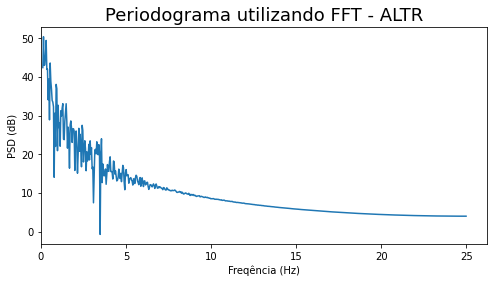

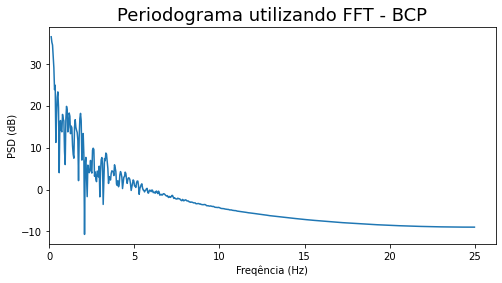

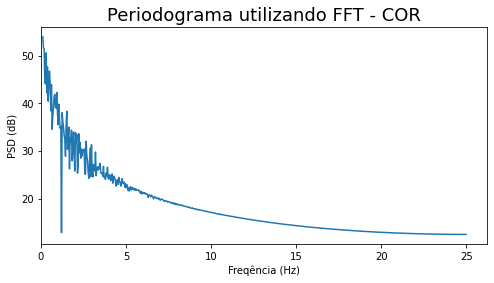

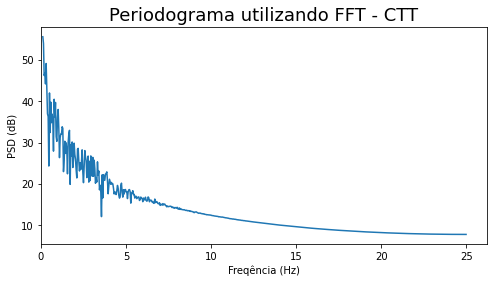

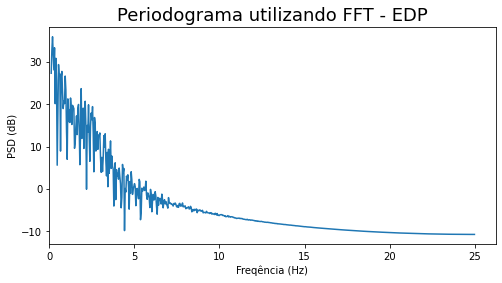

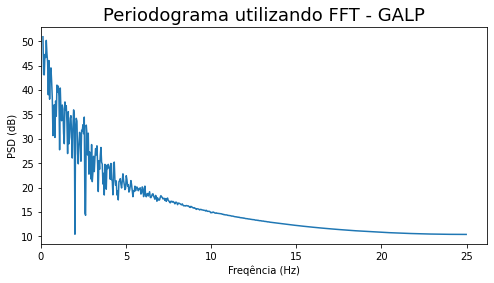

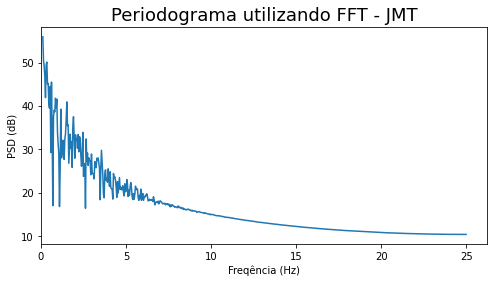

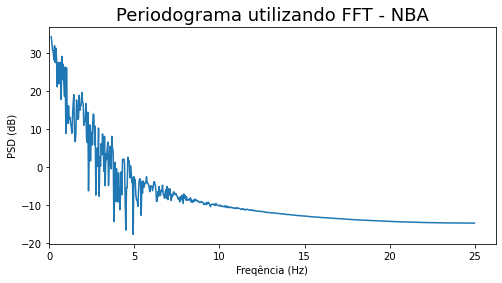

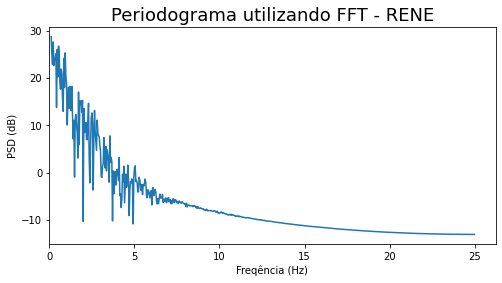

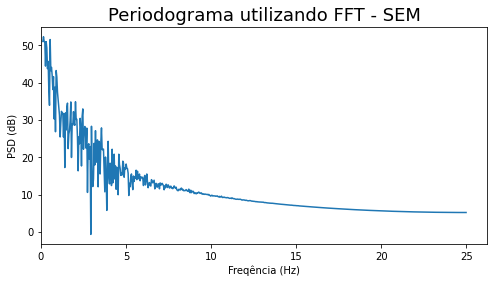

In [9]:
#periodogramas
fft_peaks_altr = altr.psd_fft(sample_freq_altr, power_altr)
fft_peaks_bcp = bcp.psd_fft(sample_freq_bcp, power_bcp)
fft_peaks_cor = cor.psd_fft(sample_freq_cor, power_cor)
fft_peaks_ctt = ctt.psd_fft(sample_freq_ctt, power_ctt)
fft_peaks_edp = edp.psd_fft(sample_freq_edp, power_edp)
fft_peaks_galp = galp.psd_fft(sample_freq_galp, power_galp)
fft_peaks_jmt = jmt.psd_fft(sample_freq_jmt, power_jmt)
fft_peaks_nba = nba.psd_fft(sample_freq_nba, power_nba)
fft_peaks_rene = rene.psd_fft(sample_freq_rene, power_rene)
fft_peaks_sem = sem.psd_fft(sample_freq_sem, power_sem)

<div style="text-align: justify"> O periodograma é a representação gráfica de uma função que quantifica a variabilidade total do sinal explicada por cada uma das componentes às várias frequências de Fourier. A grandes valores de ordenadas no periodograma correspondem frequências que estão presentes no sinal, enquanto que a valores pequenos correspondem frequências que não estão presentes. O periodograma pode, então ser utilizado para detetar componentes periódicas de um sinal.
    <br><br> No domínio da frequência, foram extraídos os 5 picos de maior amplitude de frequência e a sua média originou uma nova <i>feature</i> para cada sinal.

<div style="text-align: justify"> A tabela seguinte resume as <i>features</i> extraídas de cada sinal (as 4 do domínio do tempo e a do domínio da frequência).

In [10]:
table = [["Altri, SGPS, S.A.",round(mean_altr, 3),round(min_altr, 3),round(max_altr, 3),peaks_altr,round(fft_peaks_altr, 3)],
        ["BCP",round(mean_bcp, 3),round(min_bcp, 3),round(max_bcp, 3),peaks_bcp,round(fft_peaks_bcp, 3)],
        ["Corticeira Amorim",round(mean_cor, 3),round(min_cor, 3),round(max_cor, 3),peaks_cor,round(fft_peaks_cor, 3)],
        ["CTT",round(mean_ctt, 3),round(min_ctt, 3),round(max_ctt, 3),peaks_ctt,round(fft_peaks_ctt, 3)],
        ["EDP",round(mean_edp, 3),round(min_edp, 3),round(max_edp, 3),peaks_edp,round(fft_peaks_edp, 3)],
        ["GALP",round(mean_galp, 3),round(min_galp, 3),round(max_galp, 3),peaks_galp,round(fft_peaks_galp, 3)],
        ["Jerónimo Martins",round(mean_jmt, 3),round(min_jmt, 3),round(max_jmt, 3),peaks_jmt,round(fft_peaks_jmt, 3)],
        ["Nova Base",round(mean_nba, 3),round(min_nba, 3),round(max_nba, 3),peaks_nba,round(fft_peaks_nba, 3)],
        ["REN",round(mean_rene, 3),round(min_rene, 3),round(max_rene, 3),peaks_rene,round(fft_peaks_rene, 3)],
        ["Semapa",round(mean_sem, 3),round(min_sem, 3),round(max_sem, 3),peaks_sem,round(fft_peaks_sem, 3)]]
display(HTML(tabulate.tabulate(table, headers=["Cotação","Média","Mínimo","Máximo","N.º picos (TD)","M5P (FD)"], tablefmt='html')))
table2 = [["TD - domínio tempo"], ["FD - domínio frequência"], ["M5P - média 5 maiores picos"]]
display(HTML(tabulate.tabulate(table2,  headers=["Legenda"],tablefmt='html')))

Cotação,Média,Mínimo,Máximo,N.º picos (TD),M5P (FD)
"Altri, SGPS, S.A.",4.957,2.543,9.04,45,0.305
BCP,0.389,0.149,1.231,48,0.196
Corticeira Amorim,8.67,3,13.06,43,0.235
CTT,5.481,1.832,10.356,47,0.204
EDP,3.181,2.685,3.86,49,0.258
GALP,13.265,8.139,17.728,50,0.258
Jerónimo Martins,14.019,8.107,17.84,46,0.227
Nova Base,2.56,1.938,3.637,46,0.235
REN,2.524,2.241,2.762,49,0.392
Semapa,14.195,9.956,23.564,47,0.266


Legenda
TD - domínio tempo
FD - domínio frequência
M5P - média 5 maiores picos


# Clusterização <a class="anchor" id="chapter5"></a>

<div style="text-align: justify"> As <i>features</i> extraídas foram utilizadas para agrupar os sinais em dois <i>clusters</i>, utilizando o algoritmo K-means (algoritmo não supervisionado). Como este algoritmo se baseia em distâncias, os dados da tabela foram normalizados para ficarem na mesma escala. Utilizamos o algoritmo com 2 <i>clusters</i> pois foi o número que originou uma divisão mais equilibrada dos dados, dado o número reduzido de sinais.

In [11]:
#Normalizar dados
d = {'media': [mean_altr, mean_bcp,mean_cor, mean_ctt,mean_edp,mean_galp,mean_jmt, mean_nba,mean_rene,mean_sem], 
     'min': [min_altr,min_bcp,min_cor,min_ctt,min_edp,min_galp,min_jmt,min_nba,min_rene,min_sem],
     'max': [max_altr,max_bcp,max_cor,max_ctt,max_edp,max_galp,max_jmt,max_nba,max_rene,max_sem],
     'n_peaks': [peaks_altr,peaks_bcp,peaks_cor,peaks_ctt,peaks_edp,peaks_galp,peaks_jmt,peaks_nba,peaks_rene,peaks_sem],
     'm5p': [fft_peaks_altr,fft_peaks_bcp,fft_peaks_cor,fft_peaks_ctt,fft_peaks_edp,fft_peaks_galp,fft_peaks_jmt,fft_peaks_nba,fft_peaks_rene,fft_peaks_sem]}
df = pd.DataFrame(data=d)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

cluster 0
7 elements
[[-0.395364 -0.47652  -0.175493 -1.        0.887044]
 [-1.313514 -1.229413 -1.256237  0.5      -1.148795]
 [ 0.350967 -0.333029  0.380933 -2.       -0.421709]
 [-0.290072 -0.700181  0.006664  0.       -1.003378]
 [-0.752399 -0.431979 -0.892295  1.        0.014542]
 [-0.877187 -0.666924 -0.92319  -0.5      -0.421709]
 [-0.88431  -0.571397 -1.044289  1.        2.486632]]


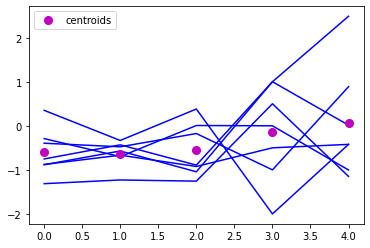

cluster 1
3 elements
[[ 1.274401  1.28271   1.026901  1.5       0.014542]
 [ 1.42611   1.272809  1.042396 -0.5      -0.567127]
 [ 1.461369  1.853924  1.834609  0.        0.15995 ]]


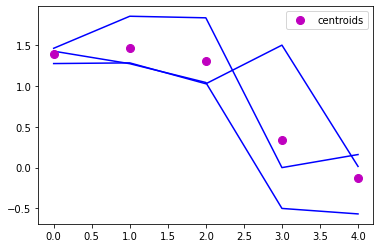

In [12]:

data = np.loadtxt('file.txt')

# Grouping the signals into 2 clusters
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(data)

centroids = k_means.cluster_centers_
labels= k_means.labels_
# Let's now plot the signals grouped in clusters...

for i in range(0,n):

    n_i = len(data[labels==i])  # number of elements in cluster i

    print("cluster "+str(i))
    print(str(n_i)+" elements")
    
    print(data[labels==i])
    
    
    #plt.figure(figsize=(10,10))
    for k in range(0,n_i):
        plt.plot(data[labels==i][k],'b')
        

    plt.plot(centroids[i],'mo',markersize=8, label='centroids')
    plt.legend(loc='best')
    plt.show()

Obtivemos dois <i>clusters</i> com os seguintes sinais:
- Cluster 0: Altri, BCP, Corticeira Amorim, CTT, EDP, Nova Base, REN
- Cluster 1: GALP, Jerónimo Martins e Semapa.

<div style="text-align: justify">Olhando aos grupos formados, é percetível que os sinais foram agrupados dando maior destaque ao valor de cada ação que é o elemento mais diferenciador deste conjunto de sinais. As <i>features</i> retiradas do domínio da frequência tiveram pouco impacto na organização dos <i>clusters</i> o que nos parece dever-se à falta de periodicidade destes sinais.

# Constituição do grupo <a class="anchor" id="chapter6"></a>

O presente trabalho foi realizado por:
- Ana Maria Moreira (202001542)
- Cláudia Pinheiro    (200104460)
- João Machado         (201503383)
- Lia Meireles         (202003483)